In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.stats import wilcoxon, ranksums
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
%matplotlib notebook

In [2]:
def weigth_proportion_influence(wilcox_file, pvalue_file):
    origin = pd.read_csv(
        wilcox_file, 
        encoding='utf-8',
        index_col=0,
        sep ="\t",
        decimal=",",
        quotechar='"'
    )

    
    valid_pval= pd.read_csv(
        pvalue_file, 
        encoding='utf-8',
        index_col=0,
        sep ="\t",
        decimal=",",
        quotechar='"',
    )


    valid_pval=valid_pval.iloc[0:].mask(valid_pval.iloc[0:]>=1,np.nan)
    valid_pval=valid_pval.iloc[0:].mask(valid_pval.iloc[0:]<1,1)
    valid_pval

    proportions = pd.read_csv(
        "/src/data/procesados/proportions/vocabulary_proportions.csv", 
        encoding='utf-8',
        index_col=0,
        sep ="\t",
        decimal=",",
        quotechar='"'
    ).stack(level=0)

    origin = origin * valid_pval
    origin = origin.stack(level=0)  
    
    weigth_proportion_dataframe = pd.concat([proportions, origin], axis=1)
    weigth_proportion_dataframe.columns=["Proporción de corpus","Estadística"]
    weigth_proportion_dataframe=weigth_proportion_dataframe.astype(float)
    return(weigth_proportion_dataframe)

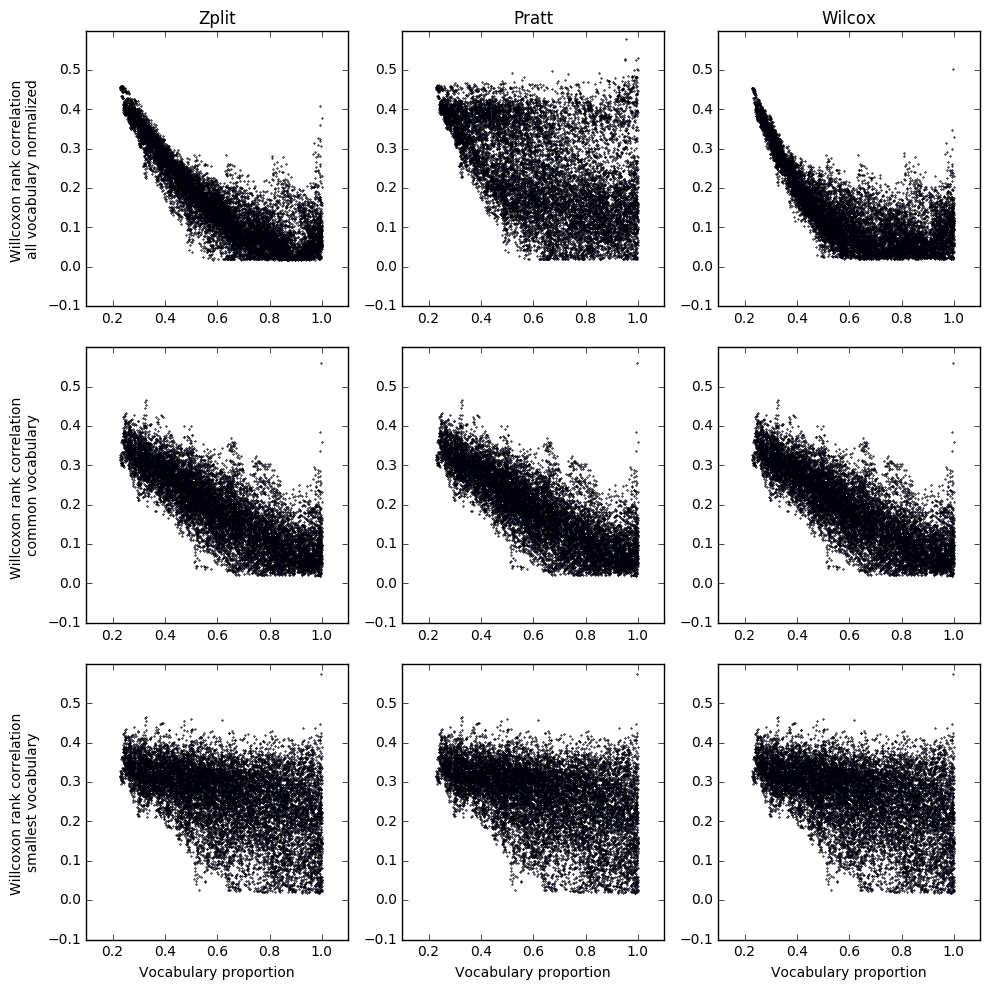

In [5]:
plt.clf
plt.close('all')
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/normalized_allcorpus/zsplit/nstat.csv","/src/data/procesados/wilcoxon_signed/normalized_allcorpus/zsplit/pvalue.csv")
x2=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/normalized_allcorpus/pratt/nstat.csv","/src/data/procesados/wilcoxon_signed/normalized_allcorpus/pratt/pvalue.csv")
x3=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/pvalue.csv")
x4=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/intersected_corpus/zsplit/nstat.csv","/src/data/procesados/wilcoxon_signed/intersected_corpus/zsplit/pvalue.csv")
x5=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/intersected_corpus/pratt/nstat.csv","/src/data/procesados/wilcoxon_signed/intersected_corpus/pratt/pvalue.csv")
x6=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/pvalue.csv")
x7=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/smallest_corpus/zsplit/nstat.csv","/src/data/procesados/wilcoxon_signed/smallest_corpus/zsplit/pvalue.csv")
x8=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/smallest_corpus/pratt/nstat.csv","/src/data/procesados/wilcoxon_signed/smallest_corpus/pratt/pvalue.csv")
x9=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/smallest_corpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/smallest_corpus/wilcox/pvalue.csv")


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[0,0])
x2.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[0,1])
x3.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[0,2])
x4.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[1,0])
x5.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[1,1])
x6.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[1,2])
x7.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[2,0])
x8.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[2,1])
x9.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, ax=axes[2,2])

#Set titles
axes[0,0].set_title("Zplit")
axes[0,1].set_title("Pratt")
axes[0,2].set_title("Wilcox")

#Set yaxis names
axes[0,0].set_ylabel("Willcoxon rank correlation \nall vocabulary normalized")
axes[0,1].set_ylabel("")
axes[0,2].set_ylabel("")
axes[1,0].set_ylabel("Willcoxon rank correlation \ncommon vocabulary")
axes[1,1].set_ylabel("")
axes[1,2].set_ylabel("")
axes[2,0].set_ylabel("Willcoxon rank correlation \nsmallest vocabulary")
axes[2,1].set_ylabel("")
axes[2,2].set_ylabel("")

#Set xaxis names
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,2].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")
axes[1,2].set_xlabel("")
axes[2,0].set_xlabel("Vocabulary proportion")
axes[2,1].set_xlabel("Vocabulary proportion")
axes[2,2].set_xlabel("Vocabulary proportion")

#Set yaxis limits
axes[0,0].set_ylim(-0.1,0.6)
axes[0,1].set_ylim(-0.1,0.6)
axes[0,2].set_ylim(-0.1,0.6)
axes[1,0].set_ylim(-0.1,0.6)
axes[1,1].set_ylim(-0.1,0.6)
axes[1,2].set_ylim(-0.1,0.6)
axes[2,0].set_ylim(-0.1,0.6)
axes[2,1].set_ylim(-0.1,0.6)
axes[2,2].set_ylim(-0.1,0.6)

"""#Set xtics
axes[0,0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0,1].set_xticks(np.arange(0, 1.1, 0.1))
axes[0,2].set_xticks(np.arange(0, 1.1, 0.1))
axes[1,0].set_xticks(np.arange(0, 1.1, 0.1))
axes[1,1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1,2].set_xticks(np.arange(0, 1.1, 0.1))
axes[2,0].set_xticks(np.arange(0, 1.1, 0.1))
axes[2,1].set_xticks(np.arange(0, 1.1, 0.1))
axes[2,2].set_xticks(np.arange(0, 1.1, 0.1))"""


plt.tight_layout()

In [47]:
fig.savefig("/src/data/procesados/graphics/nstat.svg", format="svg")
fig.savefig("/src/data/procesados/graphics/nstat.pdf", format="pdf")
fig.savefig("/src/data/procesados/graphics/nstat.eps", format="eps")

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


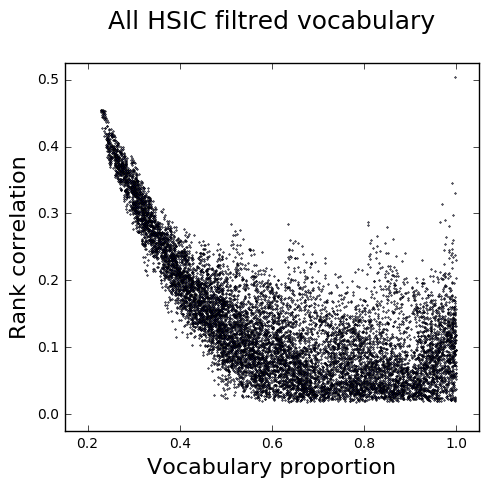

In [6]:
plt.clf
plt.close('all')
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/pvalue.csv")

fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, figsize=(5,5))
fig.set_ylim(-0.025,0.525)
fig.set_xlim(0.15,1.05)
fig.set_title("All HSIC filtred vocabulary\n", fontsize=18, fontname = "Times New Roman")
fig.set_xlabel("Vocabulary proportion",  fontsize=16)
fig.set_ylabel("Rank correlation",  fontsize=16)
fig.set_xticks(np.arange(0.2, 1.2, 0.2))

plt.tight_layout()

<IPython.core.display.Javascript object>


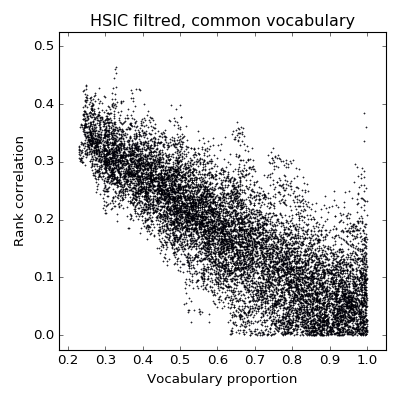

In [4]:
plt.clf
plt.close('all')
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/pvalue.csv")

fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, figsize=(5,5))
fig.set_ylim(-0.025,0.525)
fig.set_xlim(0.175,1.05)

fig.set_title("HSIC filtred, common vocabulary")
fig.set_xlabel("Vocabulary proportion")
fig.set_ylabel("Rank correlation")

plt.tight_layout()


In [ ]:
plt.clf
plt.close('all')
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/smallest_corpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/smallest_corpus/wilcox/pvalue.csv")

#fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1, figsize=(10,10))
fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1)
fig.set_ylim(-0.025,0.525)
fig.set_xlim(0.175,1.05)
fig.set_title("Vocabulario dialectal mas pequeño")
fig.set_xlabel("Proporción del vocabulario entre a y b")
fig.set_ylabel("Corelación de ranking")
plt.tight_layout()
fig.figure.savefig("/src/data/procesados/graphics/small.pdf", format="pdf")

plt.clf
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/normalized_allcorpus/wilcox/pvalue.csv")

fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1)
fig.set_ylim(-0.025,0.525)
fig.set_xlim(0.175,1.05)
fig.set_title("Todo el vocabulario dialectal de base")
fig.set_xlabel("Proporción del vocabulario entre a y b")
fig.set_ylabel("Corelación de ranking")
plt.tight_layout()
fig.figure.savefig("/src/data/procesados/graphics/all.pdf", format="pdf")


plt.clf
x1=weigth_proportion_influence("/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/nstat.csv","/src/data/procesados/wilcoxon_signed/intersected_corpus/wilcox/pvalue.csv")

fig = x1.plot(kind='scatter', x='Proporción de corpus', y='Estadística', s=0.1)
fig.set_ylim(-0.025,0.525)
fig.set_xlim(0.175,1.05)
fig.set_title("Vocabulario dialectal en común")
fig.set_xlabel("Proporción del vocabulario entre a y b")
fig.set_ylabel("Corelación de ranking")
plt.tight_layout()
fig.figure.savefig("/src/data/procesados/graphics/common.pdf", format="pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
data =  pd.read_csv(
        "/src/data/procesados/filtered/pvalue005.csv", 
        encoding='utf-8',
        index_col=0,
        sep ="\t",
        decimal=",",
        quotechar='"'
    )

def histogramcity(origin, city):
    plt.clf
    plt.close('all')
    city_series = origin[city].as_matrix()
    minimo = origin[city].min()
    maximo = origin[city].max()
    hist_plot=plt.hist(city_series, bins=100, range=[0, 0.00005])
    plt.title(city)
    plt.xlabel('Frecuencia de aparición')
    plt.ylabel('Cantidad de palabras')
    plt.savefig('/src/data/procesados/graphics/histogramas/{}.jpg'.format(city))
    return(minimo, maximo, city_series) 

#



<IPython.core.display.Javascript object>


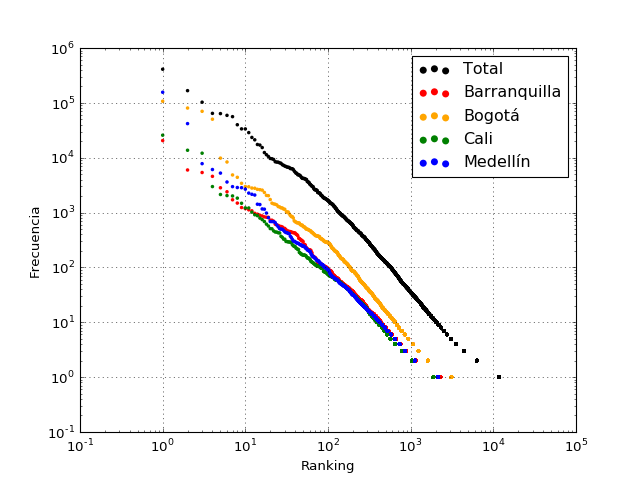

In [57]:
data =  pd.read_csv(
        "/src/data/originales/TWITTER_COLOMBIA_FREQ.csv", 
        encoding='utf-8',
        index_col=0,
        sep =",",
        skiprows=[1,2,3,4,5],
        usecols=["#CITY#", 'total', 'Bogotá', 'Medellín', 'Cali', 'Barranquilla'],
        quotechar='"',
    )

'''data =  pd.read_csv(
        "/src/data/originales/TWITTER_COLOMBIA_FREQ.csv", 
        encoding='utf-8',
        index_col=0,
        sep ="\t",
        decimal=",",
        quotechar='"'
    )'''


def zipflaw(freqdata):
    plt.clf
    plt.close('all')
    fig = plt.figure()
    ax = plt.gca()
    colors=['black', 'red','orange','green','blue']
    markers =['+','^',"s","o"]
    i=0
    for city in freqdata.columns:
        freq = freqdata[city].sample(frac = 0.01)
        rank = (freq).rank(method="average", ascending=False)
        lab = city
        if lab=='total':
            lab="Total"
        ax.scatter(rank , freq, c=colors[i], s=10, edgecolors='none', label=lab)
        i+=1
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Ranking')
    ax.legend(markerscale=2)
    ax.grid(True)
    fig.savefig('/src/data/zipf.pdf')
    
zipflaw(data)


In [114]:
data.sort_values(by='total', ascending=False)[1000000:1000001]

,total
#CITY#,
múltisala,1


$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$